In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import datetime
from sklearn.linear_model import LinearRegression

In [166]:
'''This is just where I brought in data from an excel spreadsheet.'''
hourlydata = pd.read_excel('fuelbyhour.xlsx')

In [167]:
'''Remove the year as its always the same'''
hourlydata = hourlydata.drop(['DeliveryYear'],axis=1)

In [168]:
'''Fills in the hour for the types as it read as NaN.'''
for j in range(len(hourlydata)-1):
    if math.isnan(hourlydata.iloc[j+1,1]) == True:
        hourlydata.iloc[j+1,1] = hourlydata.iloc[j,1]

,Day,Hour,Fuel,Output
0,2018-01-01,1.0,NUCLEAR,11671
1,NaN,1.0,GAS,1583
2,NaN,1.0,HYDRO,4152
3,NaN,1.0,WIND,992
4,NaN,1.0,SOLAR,0
5,NaN,1.0,BIOFUEL,3
6,NaN,2.0,NUCLEAR,11672
7,NaN,2.0,GAS,1192
8,NaN,2.0,HYDRO,4093
9,NaN,2.0,WIND,1124


In [169]:
'''Fills in the date on the entries.'''
Na = hourlydata['Day'].isna()
for j in range(len(hourlydata)-1):
    if Na[j+1] == True:
        hourlydata.iloc[j+1,0] = hourlydata.iloc[j,0]

In [170]:
'''Gets our date into the right data type'''
hourlydata['Day'] = pd.to_datetime(hourlydata['Day'])

'''Converts from integer to float because python wants that for some reason.'''
for i in range(len(hourlydata)):
    hourlydata.iloc[i,2] = float(hourlydata.iloc[i,2])

In [172]:
'''Puts the data together nicely as "newframe" '''
#newframe = (workingframe.groupby(['Day','Hour','Fuel'])['Output'].mean())

'Puts the data together nicely as "newframe" '

In [173]:
'''Sends the structure to a pickle for use in other scripts'''
#newframe.to_pickle('EnergyOutput')

'Sends the structure to a pickle for use in other scripts'

In [174]:
#Output = pd.read_pickle('EnergyOutput')

In [201]:
#hourlydata = hourlydata.set_index('Day')
Nuclear = hourlydata.where(hourlydata['Fuel']=='NUCLEAR').dropna()
Nuclear = Nuclear.reset_index()
Nuclear = Nuclear.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Nuclear'})

Gas = hourlydata.where(hourlydata['Fuel']=='GAS').dropna()
Gas = Gas.reset_index()
Gas = Gas.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Gas'})

Hydro = hourlydata.where(hourlydata['Fuel']=='HYDRO').dropna()
Hydro = Hydro.reset_index()
Hydro = Hydro.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Hydro'})

Wind = hourlydata.where(hourlydata['Fuel']=='WIND').dropna()
Wind = Wind.reset_index()
Wind = Wind.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Wind'})

Solar = hourlydata.where(hourlydata['Fuel']=='SOLAR').dropna()
Solar = Solar.reset_index()
Solar = Solar.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Solar'})

Biofuel = hourlydata.where(hourlydata['Fuel']=='BIOFUEL').dropna()
Biofuel = Biofuel.reset_index()
Biofuel = Biofuel.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Biofuel'})

Fuel = Nuclear.join(Gas)
Fuel = Fuel.join(Hydro)
Fuel = Fuel.join(Wind)
Fuel = Fuel.join(Solar)
Fuel = Fuel.join(Biofuel)
Fuel['Production'] = Fuel['Nuclear']+Fuel['Gas']+Fuel['Hydro']+Fuel['Wind']+Fuel['Solar']+Fuel['Biofuel']

In [179]:
'''Loads in and reformats the price data to be merged with the production data.'''
Price = pd.read_csv('price.csv')
Price = Price[['Date','Hour','HOEP']].rename(columns={'Date':'Day'})
Price['Day'] = pd.to_datetime(Price['Day'])
Price['Hour'] = pd.to_numeric(Price['Hour'])
Price = Price.set_index(['Day','Hour'])

In [203]:
Fuel = Fuel.join(Price)

In [183]:
'''Exports this dataframe as a pickle hell yeah gamers B)'''
#Fuel.to_pickle('MoreFuelMoreProblems')

In [195]:
'''Loads in a csv with Power demand and **Dab** formats it for merging with the mega dataframe'''
Demand = pd.read_csv('2018Demand.csv')
Demand['Day'] = pd.to_datetime(Demand['Date'])
Demand['Ontario'] = pd.to_numeric(Demand['Ontario Demand'])
Demand['Market'] = pd.to_numeric(Demand['Market Demand'])
Demand['Hour'] = pd.to_numeric(Demand['Hour'])
Demand = Demand.drop(['Date','Ontario Demand','Market Demand'],axis=1)
Demand = Demand.set_index(['Day','Hour'])

In [204]:
MasterFrame = Fuel.join(Demand)

In [205]:
MasterFrame.to_pickle('One_frame_to_rule_them_all')

In [2]:
MasterFrame = pd.read_pickle('One_frame_to_rule_them_all')

In [12]:
Demand2018 = MasterFrame['Ontario'].reset_index()
Demand2018 = Demand2018.drop(['Day','Hour'],axis=1)
Demand2018.to_pickle('2018Demand')

In [238]:
daysolar = MasterFrame['Solar'].iloc[5*31*24:5*31*24+24]
daysolar = daysolar.reset_index()
daysolar = daysolar['Solar']
daysolar

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5      11.0
6      50.0
7     111.0
8     170.0
9     194.0
10    200.0
11    182.0
12    187.0
13    187.0
14    116.0
15    102.0
16     79.0
17     39.0
18     22.0
19      4.0
20      0.0
21      0.0
22      0.0
23      0.0
Name: Solar, dtype: float64

,Nuclear,Gas,Hydro,Wind,Solar,Biofuel,Production,HOEP,Ontario,Market
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,10232.749772,1128.146347,4047.396804,1222.796461,59.043151,36.682763,16726.815297,22.444435,15689.103425,17766.184132
std,29.176403,487.389151,522.779083,100.748998,71.984570,17.893737,1165.248711,7.720449,1585.442123,1394.747858
min,10167.326027,378.945205,3254.364384,1027.720548,0.832877,11.117808,14895.810959,9.112247,13026.843836,15478.813699
25%,10226.300685,683.568493,3538.080822,1166.810274,0.889726,17.643836,15515.830137,14.822712,14228.578082,16420.100685
50%,10247.150685,1235.983562,4227.757534,1240.354795,11.480822,40.264384,17143.675342,23.985808,16338.745205,18289.269863
75%,10251.125342,1519.208904,4295.578767,1284.495890,127.772603,51.325342,17536.725342,28.820712,16628.292466,18657.236301
max,10259.241096,1766.273973,4833.334247,1385.791781,183.106849,59.772603,18223.243836,32.762740,17769.180822,19602.482192


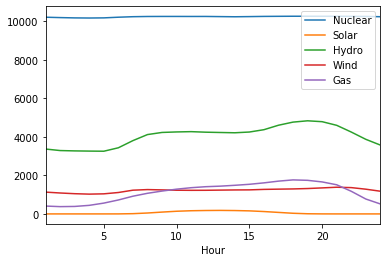

In [5]:
hourmeans = MasterFrame.groupby(['Hour']).mean()
hourmeans[['Nuclear','Solar','Hydro','Wind','Gas']].plot()
hourmeans.describe()
#hourmeans.to_pickle('hourmeans')

In [282]:
P = LinearRegression()
P = P.fit(MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).reset_index(drop=True), MasterFrame['HOEP'].reset_index(drop=True))
P.coef_
#P.score(MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).reset_index(drop=True), MasterFrame['HOEP'].reset_index(drop=True))

array([ 0.00032193,  0.00974736,  0.00789546, -0.00129893, -0.02063196,
        0.00509855])

In [5]:
MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).dtypes

Nuclear    float64
Gas        float64
Hydro      float64
Wind       float64
Solar      float64
Biofuel    float64
dtype: object

In [185]:
'''
This function is used to generate Markov mean reverting data to resemble a process defined over 24 hours.
Input types:
    series: a 24 entry pandas series of the mean behavior for the process to be defined about.
    integer: an integer value for how many time steps to simulate the process for.
Method:
    The function initializes the first value by taking the 0 mean value and adding a uniform random number generated 
    on [-1,1] multiplied by the standard deviation of the mean value series. Each subsequent value is 
    determined with the following process. The difference between the current value and the next time steps mean
    value is calculated and divided by the mean value standard deviation, this value will be referred to as delta.
        (Note: This number can be positive or negative, and both cases are considered in the code, in both cases the 
        method is the same, and I will describe exclusively the case where the normalized difference is positive.)
    Next, a random number is uniformly generated between 0 and 1, if the random number is greater than delta, the next
    entry will be generated as a normal distribution centered around the current value of the output with standard 
    deviation of delta. If the random number is less than the standard deviation, the next value is generated as a 
    normal distribution centered halfway between the current value and the next steps mean output, with standard 
    deviation of delta. This process is repeated for each hour being simulated. 
Output:
    A numpy array of length 'integer' with the Markov generated simulation data. 
'''
def meanwalk(series,integer):
    value = np.zeros(integer) #Initializes a zero array for the output data.
    std = float(series.std()) #Calculates the standard deviation of the mean data. 
    value[0] = max(series.iloc[0] + std*(2*np.random.random_sample()-1),0) #Generates the first data entry.
    for i in range(integer-1): #For the rest of the simulation time. 
        h = (i+1)%24 #Calculate what the next steps mean value index will be.  
        delta = (series.iloc[h] - value[i])/std 
        #Calculates the normalized distance between output and the next mean value. 
        if delta > 0: #If the output is less than the mean value. 
            if np.random.random_sample() > delta:
                value[i+1] = max(value[i] + np.random.normal(loc=0,scale=delta*std/2),0)
            else:
                value[i+1] = max(value[i] + np.random.normal(loc=delta*std/2,scale=delta*std/2),0)
        else: #If the output is more than the mean value.
            if np.random.random_sample() > -delta:
                value[i+1] = max(value[i] + np.random.normal(loc=0,scale=-delta*std/2),0)
            else:
                value[i+1] = max(value[i] + np.random.normal(loc=delta*std/2,scale=-delta*std/2),0)   
    return value

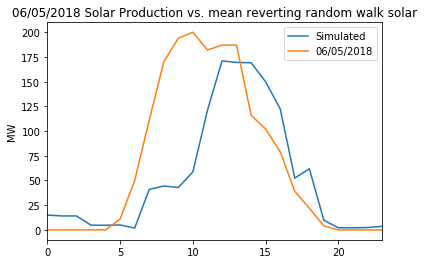

In [246]:
#Generates a single days worth of simulated data.
randomsolar = meanwalk(hourmeans['Solar'],24)
pd.Series(randomsolar).plot()
daysolar.plot()
plt.ylabel('MW')
plt.title('06/05/2018 Solar Production vs. mean reverting random walk solar')
plt.legend(['Simulated','06/05/2018'])

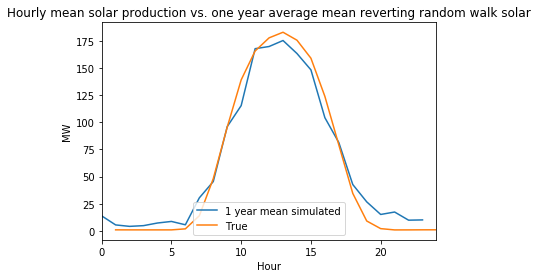

In [192]:
mean = np.array(randomsolar)
for i in range(365):
    mean = (mean+meanwalk(hourmeans['Solar'],24))/(2)
pd.Series(mean).plot()
hourmeans['Solar'].plot()
plt.ylabel('MW')
plt.title('Hourly mean solar production vs. one year average mean reverting random walk solar')
plt.legend(['1 year mean simulated','True'])

In [149]:
'''This is an alternative formulation of the previous method using uniform distributions where I used normal distributions previously'''
def meanwalk2(series,integer):
    value = np.zeros(integer)
    std = float(series.std())
    value[0] = max(series.iloc[0] + std*(np.random.random_sample()-1),0)
    for i in range(integer-1):
        h = (i+1)%24
        delta = (series.iloc[h] - value[i])/std
        if delta > 0:
            if np.random.random_sample() > delta:
                value[i+1] = max(value[i] + np.random.uniform(-abs(np.sqrt(2)*delta*std),abs(np.sqrt(2)*delta*std)),0)
            else:
                value[i+1] = max(value[i] + np.random.uniform(abs(delta*std/2)-abs(np.sqrt(2)*delta*std),abs(delta*std/2)+abs(np.sqrt(2)*delta*std)),0)
        else:
            if np.random.random_sample() > -delta:
                value[i+1] = max(value[i] + np.random.uniform(-abs(np.sqrt(2)*delta*std),value[i]+abs(np.sqrt(2)*delta*std)),0)
            else:
                value[i+1] = max(value[i] + np.random.uniform((-abs(delta*std/2))-abs(np.sqrt(2)*delta*std),-abs(delta*std/2)+abs(np.sqrt(2)*delta*std)),0)
        
    return value

In [59]:
industrydata = pd.read_csv('IndustrialElectricMean.csv',index_col=0,header=None)

In [61]:
industrydata = pd.Series(industrydata[1])

In [2]:
hourmeans = pd.read_pickle('hourmeans')

In [3]:
hourmeans

,Nuclear,Gas,Hydro,Wind,Solar,Biofuel,Production,HOEP,Ontario,Market,Industrial
Hour,,,,,,,,,,,
1.0,10208.512329,408.528767,3367.868493,1132.452055,0.895890,12.372603,15130.630137,13.720849,13687.802740,15976.457534,1500
2.0,10189.375342,378.945205,3288.991781,1086.643836,0.871233,11.164384,14955.991781,12.359836,13280.002740,15679.706849,1500
3.0,10173.621918,388.827397,3271.271233,1050.109589,0.863014,11.117808,14895.810959,11.694767,13068.728767,15516.939726,1500
4.0,10167.326027,445.252055,3261.224658,1027.720548,0.860274,11.213699,14913.597260,10.753863,13026.843836,15478.813699,1500
5.0,10174.591781,561.912329,3254.364384,1042.810959,0.865753,12.953425,15047.498630,9.112247,13282.904110,15675.493151,1625
6.0,10209.104110,724.120548,3432.986301,1111.854795,1.816438,17.594521,15497.476712,11.646740,13998.498630,16288.057534,1700
7.0,10235.326027,919.964384,3804.471233,1232.046575,13.893151,24.216438,16229.917808,20.016986,15058.273973,17156.295890,2000
8.0,10246.619178,1070.830137,4118.276712,1263.726027,48.117808,30.002740,16777.572603,26.438411,15810.468493,17812.227397,2200
9.0,10248.967123,1186.989041,4228.904110,1247.734247,95.619178,34.819178,17043.032877,27.369890,16131.282192,18125.567123,2500


In [13]:
retail = pd.Series([65, 65, 65, 65, 65, 65, 65, 94, 94, 94, 94, 134, 134, 134, 134, 134, 134, 94, 94, 65, 65, 65, 65, 65])

In [28]:
#Calculating the demand weighted mean price of electricity
phat = sum(hourmeans['Ontario'].reset_index(drop=True).multiply(retail.reset_index(drop=True)))/sum(hourmeans['Ontario'])
phat

91.06357900612548

In [96]:
def demand_response(series,integer,):
    
    phat = 91.06357900612548 #Dollars per megawatt hour
    dbar = series.mean() #Megawatt hours
    
    price = np.zeros(integer) #Initializes an empty pricing array
    demand = np.zeros(integer) #Initializes a zero array for the output data.
    
    std = float(series.std()) #Calculates the standard deviation of the mean data.
    
    demand[0] = max(series.iloc[0] + std*(2*np.random.random_sample()-1),0) #Generates the first data entry.
    price[0] = phat
    for i in range(integer-1): #For the rest of the simulation time. 
        h = (i+1)%24 #Calculate what the next steps mean demand index will be.  
        delta = (series.iloc[h] - demand[i])/std
        R = (demand[i])/dbar
        T = price[i]/phat
        price[i+1] = R*phat
        #Calculates the normalized distance between output and the next mean demand. 
        if delta > 0: #If the output is less than the mean demand. 
            if np.random.random_sample() < T:
                demand[i+1] = max(demand[i] + np.random.normal(loc=0,scale=min(T,10)*delta*std+.1),0)
            else:
                demand[i+1] = max(demand[i] + np.random.normal(loc=delta*std/2,scale=delta*std+.1),0)
        else: #If the output is more than the mean demand.
            if np.random.random_sample() > T:
                demand[i+1] = max(demand[i] + np.random.normal(loc=0,scale=-min((1/T),10)*delta*std+.1),0)
            else:
                demand[i+1] = max(demand[i] + np.random.normal(loc=delta*std/2,scale=-delta*std+.1),0)   
    return demand, price

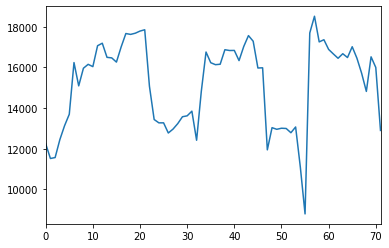

In [97]:
demand, price = demand_response(hourmeans['Ontario'],72)
pd.Series(demand).plot()

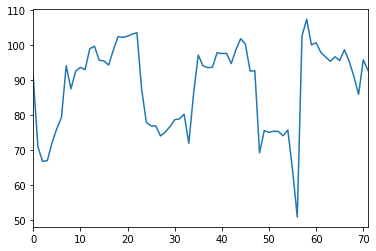

In [98]:
pd.Series(price).plot()

In [99]:
PHAT = sum(pd.Series(price)*pd.Series(demand))/sum(pd.Series(demand))
PHAT

89.66975814702651